In [7]:
# Imports
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# get titanic & test csv files as a DataFrame
train_df = pd.read_csv("./train.csv")
test_df    = pd.read_csv("./test.csv")
combine = [train_df, test_df]

# preview the data
print(train_df.columns.values)
train_df.head(3)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [11]:
train_df.describe()
#train_df.describe(include=['O'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


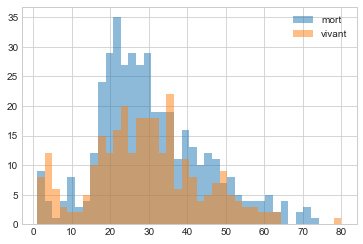

In [16]:
plt.hist(train_df[train_df.Survived==0].Age,bins=40,range=[1,80],alpha=0.5, label='mort')
plt.hist(train_df[train_df.Survived==1].Age,bins=40,range=[1,80],alpha=0.5, label='vivant')

plt.legend()

In [17]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [20]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


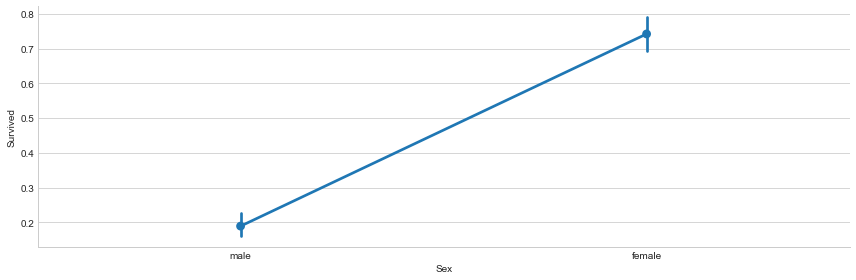

In [23]:
# plot
sns.factorplot('Sex','Survived', data=titanic_df,size=4,aspect=3)


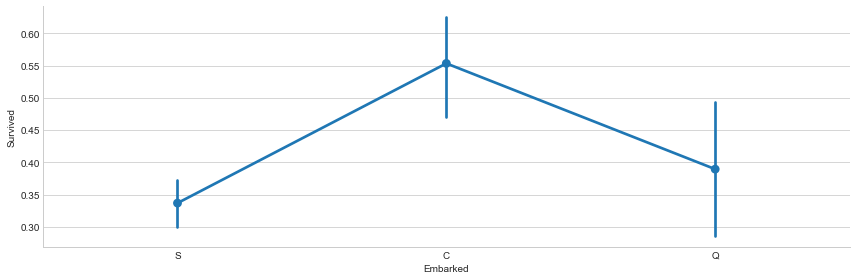

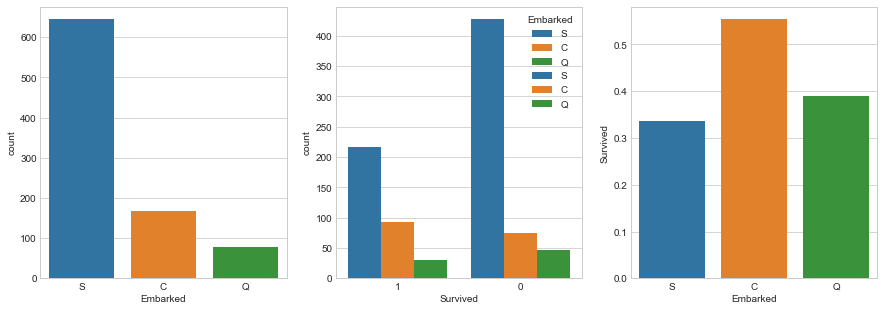

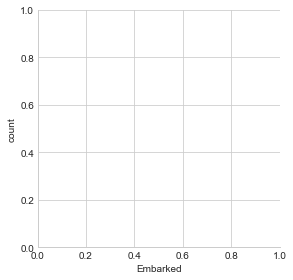

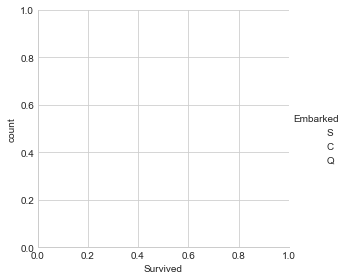

In [28]:
# Embarcation
sns.factorplot('Embarked','Survived', data=train_df,size=4,aspect=3)

#sns.countplot(x='Embarked', data=train_df)
#sns.countplot(x='Embarked', hue="Survived", data=train_df)
#sns.countplot(x='Sex', hue="Survived", data=train_df)
#sns.countplot(x='SibSp', hue="Survived", data=train_df)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.factorplot('Embarked',data=train_df,kind='count',order=['S','C','Q'],ax=axis1)
sns.factorplot('Survived',hue="Embarked",data=train_df,kind='count',order=[1,0],ax=axis2)
#sns.countplot(x='Embarked', data=train_df, ax=axis1)
#sns.countplot(x='Survived', hue="Embarked", data=train_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

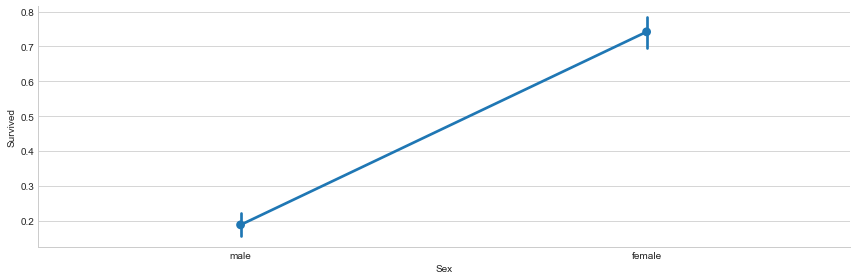

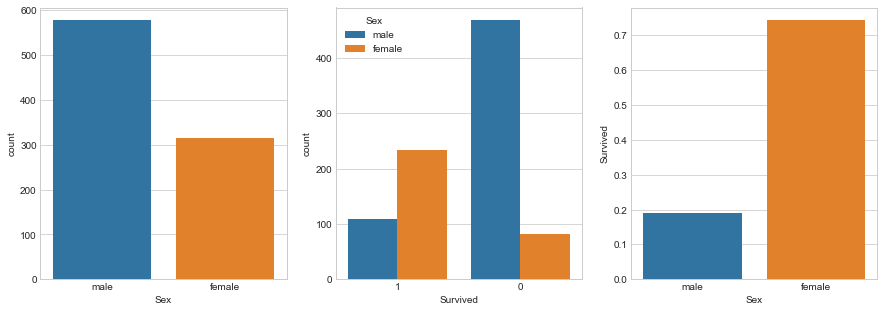

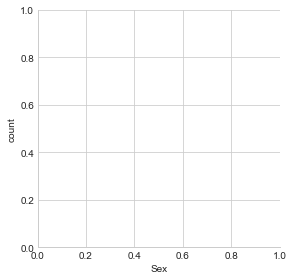

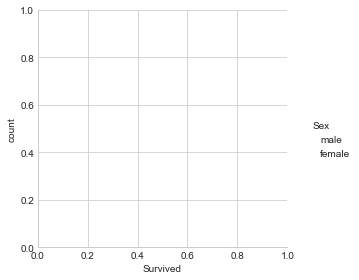

In [31]:
# Sex
sns.factorplot('Sex','Survived', data=train_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.factorplot('Sex',data=train_df,kind='count',order=['male','female'],ax=axis1)
sns.factorplot('Survived',hue="Sex",data=train_df,kind='count',order=[1,0],ax=axis2)

# group by sex, and get the mean for survived passengers for each value in sex
sex_perc = train_df[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=sex_perc,order=['male','female'],ax=axis3)

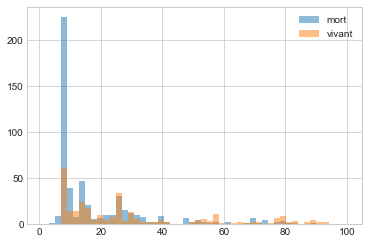

In [34]:
plt.hist(train_df[train_df.Survived==0].Fare,bins=50,range=[1,100],alpha=0.5, label='mort')
plt.hist(train_df[train_df.Survived==1].Fare,bins=50,range=[1,100],alpha=0.5, label='vivant')

plt.legend()

In [35]:
#drop ticket and cabin 
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 12), (418, 11), (891, 12), (418, 11))


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [36]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [37]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [39]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


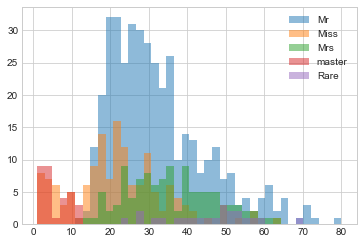

In [44]:
plt.hist(train_df[train_df.Title==1].Age,bins=40,range=[1,80],alpha=0.5, label='Mr')
plt.hist(train_df[train_df.Title==2].Age,bins=40,range=[1,80],alpha=0.5, label='Miss')
plt.hist(train_df[train_df.Title==3].Age,bins=40,range=[1,80],alpha=0.5, label='Mrs')
plt.hist(train_df[train_df.Title==4].Age,bins=40,range=[1,80],alpha=0.5, label='master')
plt.hist(train_df[train_df.Title==5].Age,bins=40,range=[1,80],alpha=0.5, label='Rare')
plt.legend()

In [40]:
#now, drop name and passengerId
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [41]:
#convert sex to numerical
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


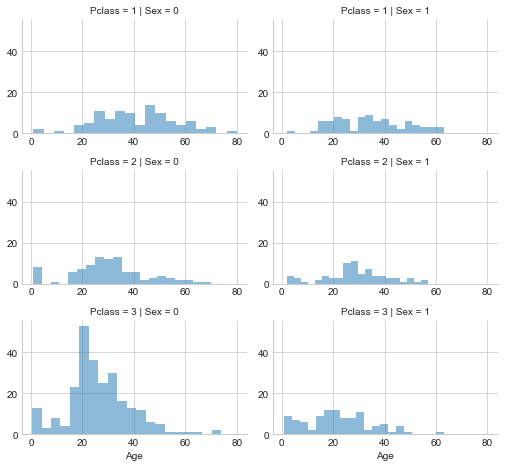

In [45]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [46]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [47]:
#Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [48]:
#family size variable
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [49]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [50]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [51]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [52]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22,1,0,7.2500,0,1,2,0
1,1,1,1,38,1,0,71.2833,1,3,2,0
2,1,3,1,26,0,0,7.9250,0,2,1,1
3,1,1,1,35,1,0,53.1000,0,3,2,0
4,0,3,0,35,0,0,8.0500,0,1,1,1


In [53]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,0,34,0,0,7.8292,2,1,1,1
1,893,3,1,47,1,0,7.0000,0,3,2,0
2,894,2,0,62,0,0,9.6875,2,1,1,1
3,895,3,0,27,0,0,8.6625,0,1,1,1
4,896,3,1,22,1,1,12.2875,0,3,3,0


In [54]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

In [58]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.93

In [59]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.134734
7,Title,0.491407
6,Embarked,0.172128
8,FamilySize,0.163639
5,Fare,0.004060
2,Age,-0.037459
9,IsAlone,-0.432194
4,Parch,-0.452204
3,SibSp,-0.688383
0,Pclass,-0.956551


In [60]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

90.91

In [61]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.62

In [62]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.36

In [63]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


72.39

In [64]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.56

In [65]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


61.73

In [66]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [92]:
# Random Forest

random_forest = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=200)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.98

In [93]:
# Gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1)
gradient_boost.fit(X_train,Y_train)
Y_pred = gradient_boost.predict(X_test)
gradient_boost.score(X_train, Y_train)
acc_gradient_boost = round(gradient_boost.score(X_train, Y_train) * 100, 2)
acc_gradient_boost

86.08

In [94]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient boost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_gradient_boost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,98.20
3,Random Forest,97.98
0,Support Vector Machines,90.91
9,Gradient boost,86.08
1,KNN,84.62
2,Logistic Regression,81.93
4,Naive Bayes,80.36
7,Linear SVC,78.56
5,Perceptron,72.39
6,Stochastic Gradient Decent,61.73


In [95]:
from sklearn.metrics import accuracy_score, auc
accuracy_score(random_forest.predict(X_train), Y_train)

0.97979797979797978

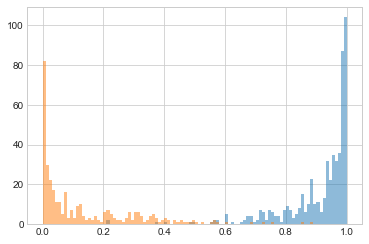

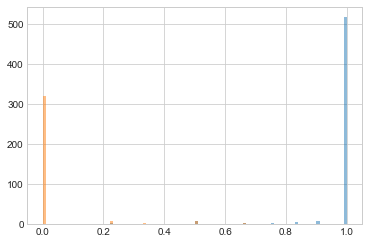

In [96]:
plt.hist(random_forest.predict_proba(X_train[train_df.Survived==0])[:,0], bins=100, range=[0,1], alpha=0.5)
plt.hist(random_forest.predict_proba(X_train[train_df.Survived==1])[:,0], bins=100, range=[0,1], alpha=0.5)
plt.show()
plt.hist(decision_tree.predict_proba(X_train[train_df.Survived==0])[:,0], bins=100, range=[0,1], alpha=0.5)
plt.hist(decision_tree.predict_proba(X_train[train_df.Survived==1])[:,0], bins=100, range=[0,1], alpha=0.5)
plt.show()

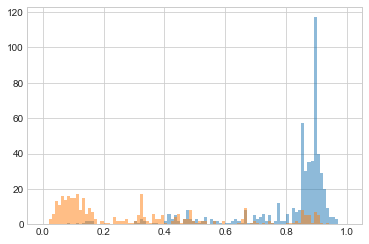

In [97]:
plt.hist(gradient_boost.predict_proba(X_train[train_df.Survived==0])[:,0], bins=100, range=[0,1], alpha=0.5)
plt.hist(gradient_boost.predict_proba(X_train[train_df.Survived==1])[:,0], bins=100, range=[0,1], alpha=0.5)
plt.show()

In [98]:
from sklearn.metrics import roc_curve
y_pred_random_forest = random_forest.predict_proba(X_train)[:, 1]
fpr_random_forest, tpr_random_forest, _ = roc_curve(Y_train, y_pred_random_forest)

auc(fpr_random_forest, tpr_random_forest, reorder=True)

0.99657804194761335

In [99]:
y_pred_decision_tree = decision_tree.predict_proba(X_train)[:, 1]
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(Y_train, y_pred_decision_tree)

auc(fpr_decision_tree, tpr_decision_tree, reorder=True)

0.99915582824699867

In [100]:
y_pred_gradient_boost = gradient_boost.predict_proba(X_train)[:, 1]
fpr_gradient_boost, tpr_gradient_boost, _ = roc_curve(Y_train, y_pred_gradient_boost)

auc(fpr_gradient_boost, tpr_gradient_boost, reorder=True)

0.91353497587319854

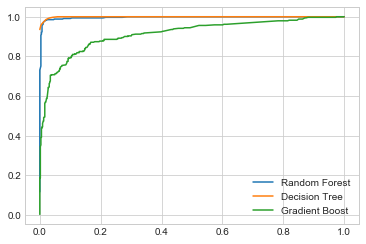

In [101]:
plt.plot(fpr_random_forest, tpr_random_forest, label='Random Forest')
plt.plot(fpr_decision_tree, tpr_decision_tree, label='Decision Tree')
plt.plot(fpr_gradient_boost, tpr_gradient_boost, label='Gradient Boost')
plt.legend()

In [102]:
Y_pred = random_forest.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission2.csv', index=False)